# Compare task vs rest adjusted rand index

In [1]:
import sys
sys.path.append("..")
import ProbabilisticParcellation.evaluate as ev
import ProbabilisticParcellation.util as ut
import ProbabilisticParcellation.functional_profiles as fp
import ProbabilisticParcellation.similarity_colormap as sc
import Functional_Fusion.dataset as ds
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from scipy import stats
import glob
import numpy as np




/Users/callithrix/Documents/Projects/Functional_Fusion/code/env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
files = sorted(
    glob.glob(f'{ut.model_dir}//Models/Evaluation/nettekoven_68/ARI_*'))

list_of_dfs = []
for f, file in enumerate(files):
    t = pd.read_csv(file, delimiter='\t')
    list_of_dfs.append(t)
    t['source'] = file.split('/')[-1].strip('.tsv')

D = pd.concat(list_of_dfs, ignore_index=True).reset_index(drop=True)
D.drop_duplicates(subset=D.columns.difference(['source']))


# Symmetric / Asymmetric indicator
for r, row in D.iterrows():
    if 'sym' in row['source']:
        D.loc[r, 'symmetry'] = 'symmetric'
    else:
        D.loc[r, 'symmetry'] = 'asymmetric'



In [3]:
# Get the ARI values for each model into a dataframe
ARI = pd.DataFrame()
all_datasets = [D.train_data_a.tolist() + D.train_data_b.tolist()]
# get unique datasets
all_datasets = list(set([item for sublist in all_datasets for item in sublist]))

for dset in all_datasets:
    rows = D[(D.train_data_a == dset) | (D.train_data_b == dset)]
    for row in rows.iterrows():
        train_data_comp = [train_data for train_data in [
            row[1].train_data_a, row[1].train_data_b] if train_data != dset][0]
        res = pd.DataFrame({
            'train_data':dset,
            'train_data_comp': train_data_comp,
            'ARI':1-row[1].ari,
            'symmetry':row[1].symmetry,
            'source':row[1].source,
            'K':row[1].K,
            },
            index=[0])
        if len(dset.split(' ')) == 1:
            res['train_type'] = 'indiv'
        else:
            res['train_type'] = 'all'
        
        if len(train_data_comp.split(' ')) == 7:
             res['train_data_comp'] = 'task'
        elif len(train_data_comp.split(' ')) == 8:
            res['train_data_comp'] = 'task_and_rest'

        if len(dset.split(' ')) == 7:
            res['train_data'] = 'task'
        elif len(dset.split(' ')) == 8:
            res['train_data'] = 'task_and_rest'

        ARI = pd.concat([ARI, res], ignore_index=True)






In [4]:
ARI.head()

,train_data,train_data_comp,ARI,symmetry,source,K,train_type
0,task_and_rest,['MDTB'],0.433430,symmetric,ARI_sym_indiv-all_space-MNISymC3_K-10_taskall,10,all
1,task_and_rest,['Pontine'],0.249312,symmetric,ARI_sym_indiv-all_space-MNISymC3_K-10_taskall,10,all
2,task_and_rest,['Nishimoto'],0.298860,symmetric,ARI_sym_indiv-all_space-MNISymC3_K-10_taskall,10,all
3,task_and_rest,['IBC'],0.289655,symmetric,ARI_sym_indiv-all_space-MNISymC3_K-10_taskall,10,all
4,task_and_rest,['WMFS'],0.482690,symmetric,ARI_sym_indiv-all_space-MNISymC3_K-10_taskall,10,all


In [5]:
figsize = (10, 10)
crits = ['dcbc_group', 'dcbc_indiv']


In [6]:
ARI

,train_data,train_data_comp,ARI,symmetry,source,K,train_type
0,task_and_rest,['MDTB'],0.433430,symmetric,ARI_sym_indiv-all_space-MNISymC3_K-10_taskall,10,all
1,task_and_rest,['Pontine'],0.249312,symmetric,ARI_sym_indiv-all_space-MNISymC3_K-10_taskall,10,all
2,task_and_rest,['Nishimoto'],0.298860,symmetric,ARI_sym_indiv-all_space-MNISymC3_K-10_taskall,10,all
3,task_and_rest,['IBC'],0.289655,symmetric,ARI_sym_indiv-all_space-MNISymC3_K-10_taskall,10,all
4,task_and_rest,['WMFS'],0.482690,symmetric,ARI_sym_indiv-all_space-MNISymC3_K-10_taskall,10,all
...,...,...,...,...,...,...,...
435,['IBC'],['Nishimoto'],0.150378,symmetric,ARI_sym_indiv-all_space-MNISymC3_K-68_taskall,68,indiv
436,['IBC'],['WMFS'],0.207405,symmetric,ARI_sym_indiv-all_space-MNISymC3_K-68_taskall,68,indiv
437,['IBC'],['Demand'],0.177610,symmetric,ARI_sym_indiv-all_space-MNISymC3_K-68_taskall,68,indiv
438,['IBC'],['Somatotopic'],0.109184,symmetric,ARI_sym_indiv-all_space-MNISymC3_K-68_taskall,68,indiv


In [7]:
# train_data_comp = [train_data for train_data in [
#     row.train_data_a, row.train_data_b] if train_data != dset][0]
type(dset)
row[1]


model_name_a                                             sym_Ib
model_name_b                                             sym_Hc
atlas                                                  MNISymC3
K                                                            68
train_data_a                                            ['IBC']
train_data_b                                            ['HCP']
train_loglik_a                                       926628.375
train_loglik_b                                      130507368.0
ari                                                    0.867339
source            ARI_sym_indiv-all_space-MNISymC3_K-68_taskall
symmetry                                              symmetric
Name: 213, dtype: object

<Figure size 1000x1000 with 0 Axes>

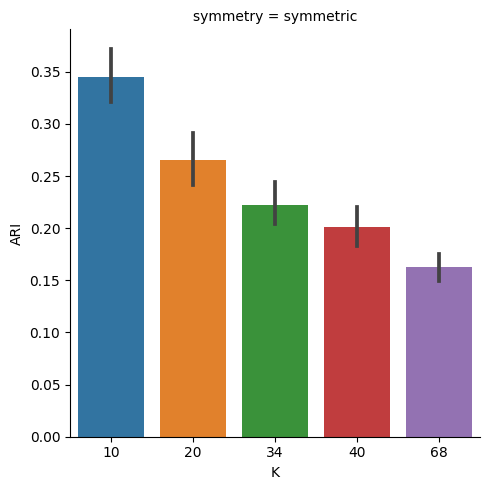

In [8]:

plt.figure(figsize=figsize)
sb.catplot(
    data=ARI, x="K", y="ARI", col="symmetry", kind="bar")



[Text(0, 0, 'task'), Text(1, 0, 'task_and_rest'), Text(2, 0, "['MDTB']"), Text(3, 0, "['Pontine']"), Text(4, 0, "['Nishimoto']"), Text(5, 0, "['IBC']"), Text(6, 0, "['WMFS']"), Text(7, 0, "['Somatotopic']"), Text(8, 0, "['HCP']"), Text(9, 0, "['Demand']")]


<Figure size 1000x4000 with 0 Axes>

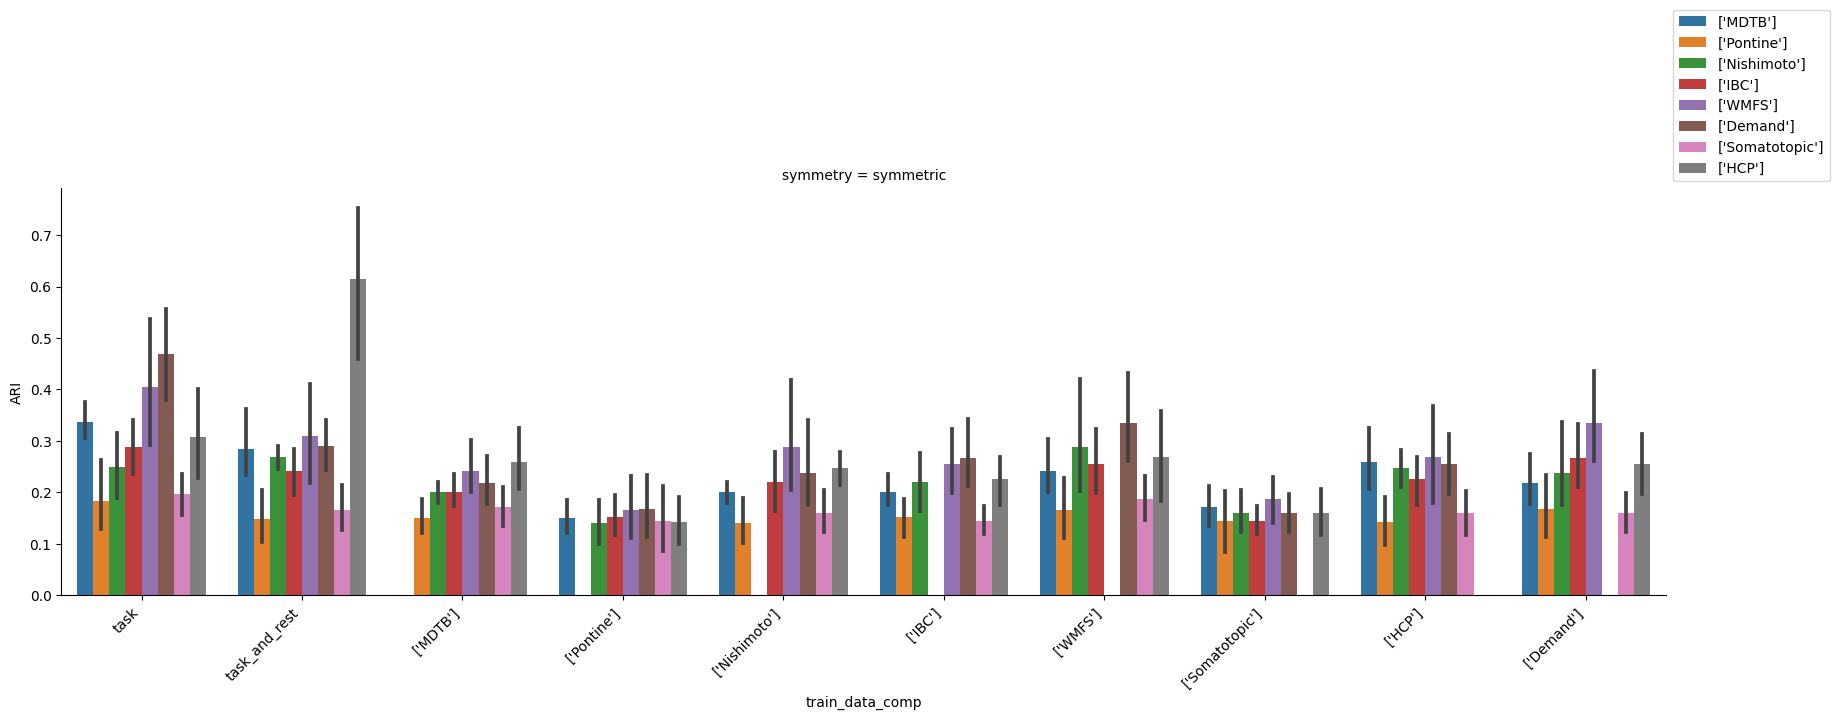

In [9]:
figsize = (10, 40)

plt.figure(figsize=figsize)
g = sb.catplot(
    data=ARI[ARI.train_type == 'indiv'], x="train_data_comp", y="ARI", col="symmetry", hue="train_data", kind="bar", legend=False, hue_order = ["['MDTB']", "['Pontine']", "['Nishimoto']", "['IBC']", "['WMFS']", "['Demand']", "['Somatotopic']", "['HCP']"])
# plt.rcParams['figure.figsize'] = figsize
g.fig.set_size_inches(20, 5)



# Make xtick labels more readable
for ax in plt.gcf().axes:
    xticklabels = ax.get_xticklabels()
    labels = [x.get_text() for x in xticklabels]    

    ax.set_xticklabels(labels, rotation=45, horizontalalignment='right')

# Move legend outside of plot
plt.legend(loc='lower left', bbox_to_anchor=(1, 1))

print(xticklabels)




[Text(0, 0, "['MDTB']"), Text(1, 0, "['Pontine']"), Text(2, 0, "['Nishimoto']"), Text(3, 0, "['IBC']"), Text(4, 0, "['WMFS']"), Text(5, 0, "['Demand']"), Text(6, 0, "['Somatotopic']"), Text(7, 0, "['HCP']"), Text(8, 0, 'task'), Text(9, 0, 'task_and_rest')]


<Figure size 1000x4000 with 0 Axes>

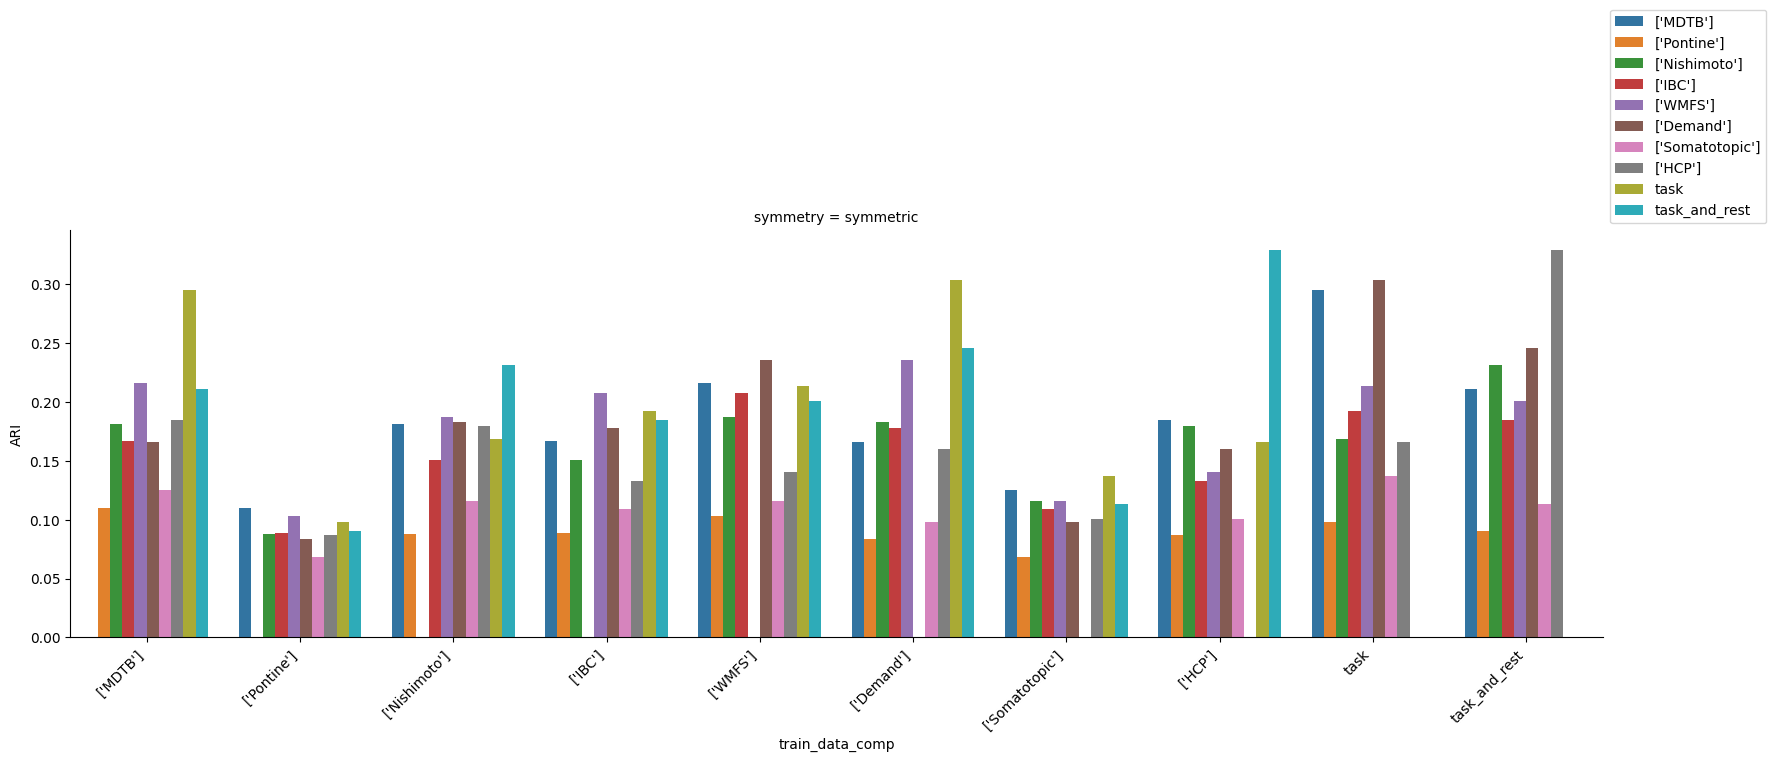

In [10]:
figsize = (10, 40)

plt.figure(figsize=figsize)
g = sb.catplot(
    data=ARI[(ARI.K == 68)], x="train_data_comp", y="ARI", col="symmetry", hue="train_data", kind="bar", legend=False, hue_order=["['MDTB']", "['Pontine']", "['Nishimoto']", "['IBC']", "['WMFS']", "['Demand']", "['Somatotopic']", "['HCP']", 'task', 'task_and_rest'])
# plt.rcParams['figure.figsize'] = figsize
g.fig.set_size_inches(20, 5)


# Make xtick labels more readable
for ax in plt.gcf().axes:
    xticklabels = ax.get_xticklabels()
    labels = [x.get_text() for x in xticklabels]

    ax.set_xticklabels(labels, rotation=45, horizontalalignment='right')

# Move legend outside of plot
plt.legend(loc='lower left', bbox_to_anchor=(1, 1))

print(xticklabels)


<Figure size 1000x4000 with 0 Axes>

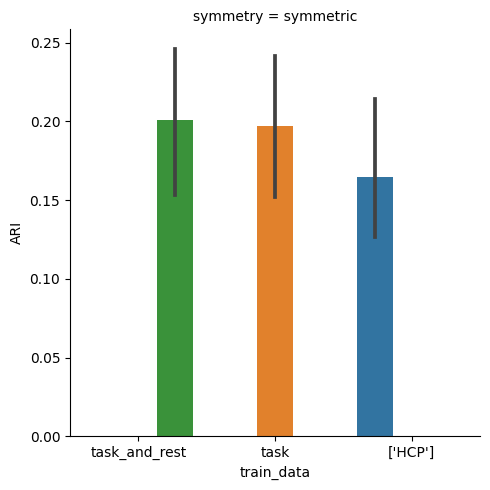

In [11]:
# Only show task, task_and_rest, and HCP for the 68 model collapsed across train_data_comp
figsize = (10, 40)
ARI_68 = ARI[(ARI.K == 68) & (ARI.train_data.isin(
    ['task', 'task_and_rest', "['HCP']"]))]
plt.figure(figsize=figsize)
g = sb.catplot(data=ARI_68, x="train_data", y="ARI", col="symmetry", hue="train_data",
               kind="bar", legend=False, hue_order=["['HCP']", 'task', 'task_and_rest'])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[Text(0, 0, "['MDTB']"), Text(1, 0, "['Pontine']"), Text(2, 0, "['Nishimoto']"), Text(3, 0, "['IBC']"), Text(4, 0, "['WMFS']"), Text(5, 0, "['Demand']"), Text(6, 0, "['Somatotopic']"), Text(7, 0, "['HCP']"), Text(8, 0, 'task'), Text(9, 0, 'task_and_rest')]


<Figure size 1000x4000 with 0 Axes>

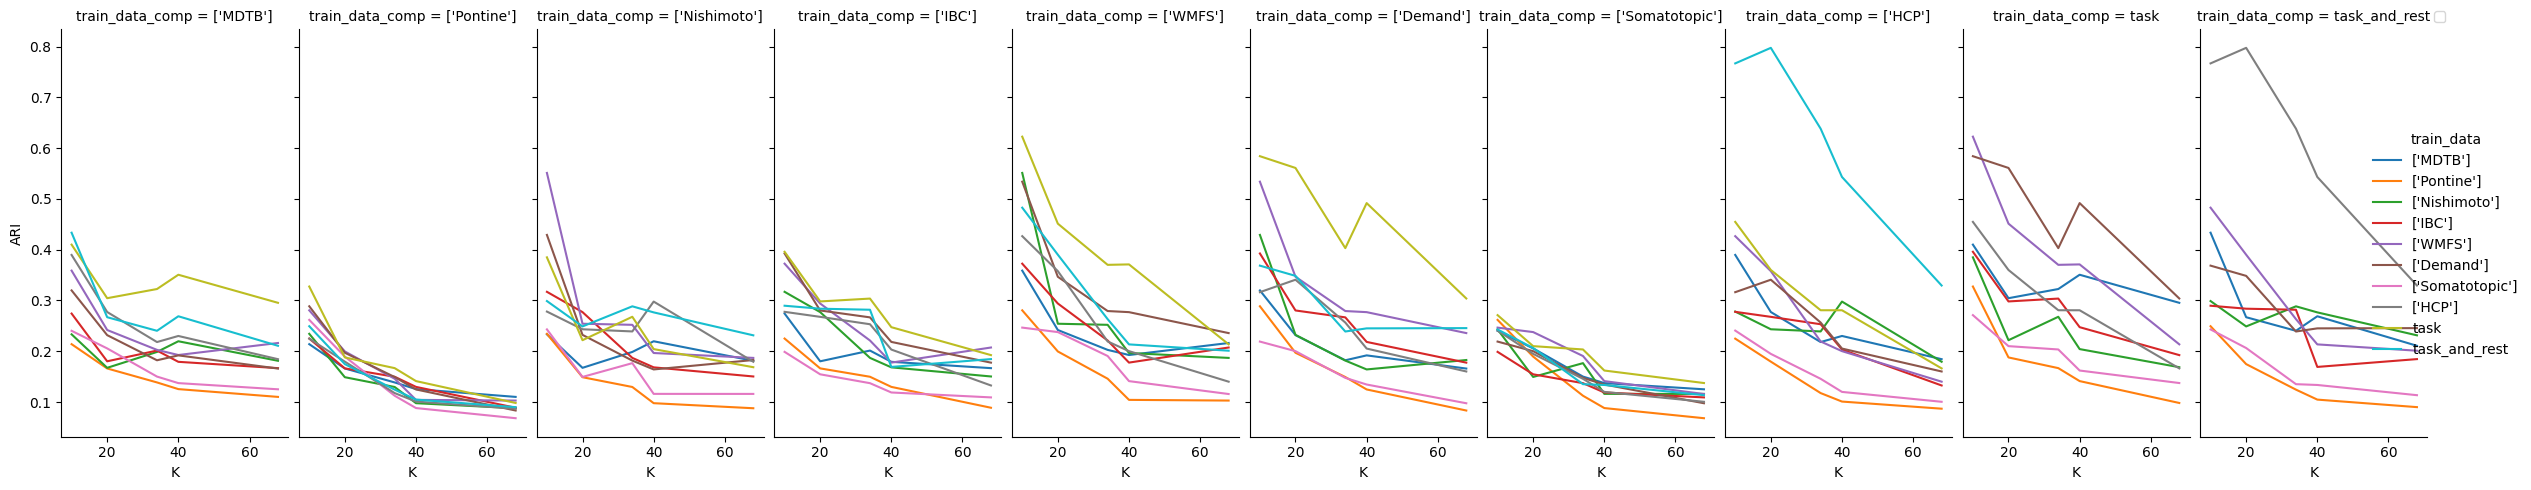

In [12]:
figsize = (10, 40)

plt.figure(figsize=figsize)
g = sb.relplot(
    data=ARI, x="K", y="ARI", col="train_data_comp", hue="train_data", kind="line", legend=True, hue_order=["['MDTB']", "['Pontine']", "['Nishimoto']", "['IBC']", "['WMFS']", "['Demand']", "['Somatotopic']", "['HCP']", 'task', 'task_and_rest'])
# plt.rcParams['figure.figsize'] = figsize
g.fig.set_size_inches(25, 5)


# # Make xtick labels more readable
# for ax in plt.gcf().axes:
#     xticklabels = ax.get_xticklabels()
#     # xticklabels = [x.get_text() for x in xticklabels]

#     # Replace labels with shorter names
#     labels = []
#     for x in xticklabels:
#         label = x.get_text()
#         if len(label.split(' ')) == 7:
#             label = 'task'
#         elif len(label.split(' ')) == 8:
#             label = 'task_and_rest'

#         labels.append(label)

#     ax.set_xticklabels(labels, rotation=45, horizontalalignment='right')

# Move legend outside of plot
plt.legend(loc='lower left', bbox_to_anchor=(1, 1))

print(xticklabels)


In [28]:
# Make wide version of dataframe by making train_data values into columns
ARI_wide = ARI.pivot_table(index=['train_data'], columns='train_data_comp', values='ARI').reset_index()
# Make train_data_comp into index
ARI_wide = ARI_wide.set_index(['train_data'])


<AxesSubplot: xlabel='train_data_comp', ylabel='train_data'>

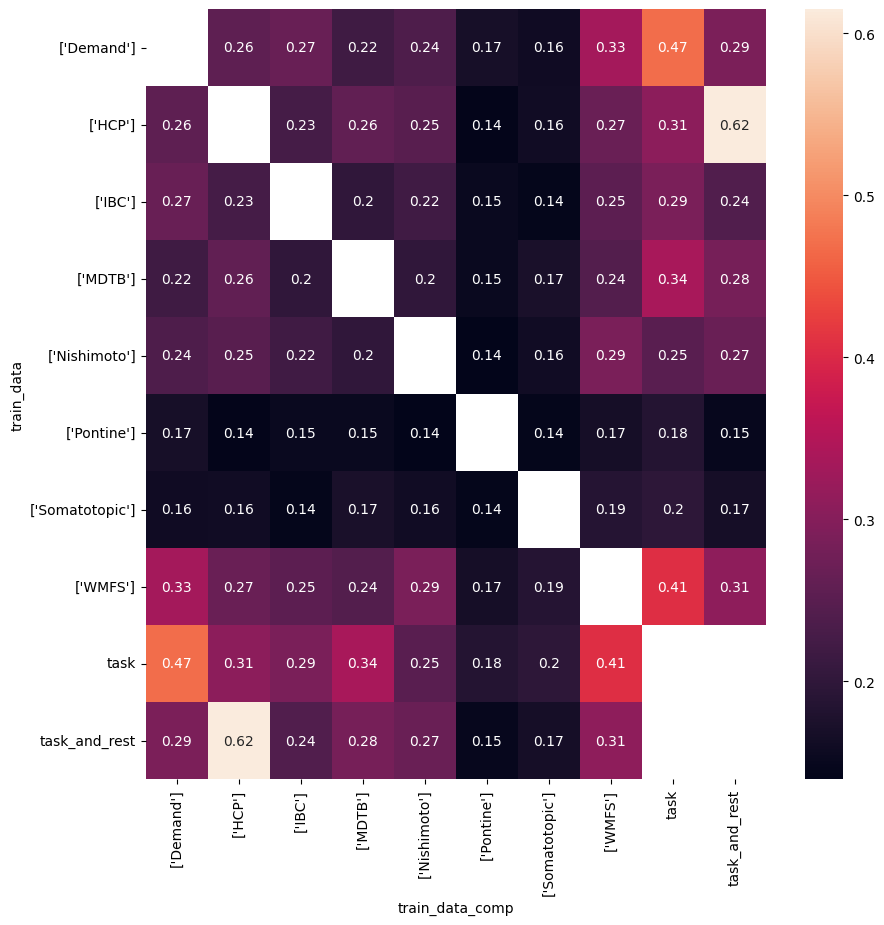

In [330]:
figsize = (10, 10)

plt.figure(figsize=figsize)
sb.heatmap(ARI_wide, annot=True)


### MDS Plots

In [14]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


In [26]:
# ARI_wide.columns[:-2]
# ARI_wide[ARI_wide.columns[:-2]]
# ARI_wide.iloc[:len(ARI_wide.columns[:-2]), :]


In [27]:
ARI_wide


train_data_comp,['Demand'],['HCP'],['IBC'],['MDTB'],['Nishimoto'],['Pontine'],['Somatotopic'],['WMFS'],task,task_and_rest
train_data,,,,,,,,,,
['Demand'],NaN,0.255857,0.267125,0.218342,0.238004,0.168621,0.159820,0.334510,0.468733,0.289321
['HCP'],0.255857,NaN,0.226931,0.259929,0.247537,0.142012,0.160381,0.268813,0.308516,0.615003
['IBC'],0.267125,0.226931,NaN,0.200374,0.219967,0.151964,0.143742,0.254555,0.287514,0.241794
['MDTB'],0.218342,0.259929,0.200374,NaN,0.200085,0.150890,0.171706,0.242459,0.336612,0.284101
['Nishimoto'],0.238004,0.247537,0.219967,0.200085,NaN,0.139721,0.160261,0.288183,0.249506,0.268842
['Pontine'],0.168621,0.142012,0.151964,0.150890,0.139721,NaN,0.144039,0.166690,0.184326,0.148670
['Somatotopic'],0.159820,0.160381,0.143742,0.171706,0.160261,0.144039,NaN,0.186415,0.196868,0.166356
['WMFS'],0.334510,0.268813,0.254555,0.242459,0.288183,0.166690,0.186415,NaN,0.405717,0.310143


In [64]:
mds = MDS(n_compoents=2, dissimilarity='precompute')

# Subset rows to only include first 8 rows and columns to only include first 8 columns
ARI_indiv = ARI_wide[ARI_wide.columns[:-2]
                     ].iloc[:len(ARI_wide.columns[:-2]), :]

# Replace nans with zeros
ARI_indiv = ARI_indiv.fillna(1)

# Make numbers in pandas dataframe into numpy array
X = 1-ARI_indiv.to_numpy()
print(X)

X_transform = mds.fit_transform(X)
print(X_transform)


[[0.         0.74414268 0.73287461 0.78165826 0.76199561 0.83137946
  0.84018016 0.66548988]
 [0.74414268 0.         0.77306852 0.74007118 0.75246261 0.85798788
  0.83961947 0.73118677]
 [0.73287461 0.77306852 0.         0.79962643 0.78003337 0.84803638
  0.8562583  0.74544462]
 [0.78165826 0.74007118 0.79962643 0.         0.79991456 0.84911031
  0.82829418 0.75754067]
 [0.76199561 0.75246261 0.78003337 0.79991456 0.         0.86027862
  0.8397388  0.71181744]
 [0.83137946 0.85798788 0.84803638 0.84911031 0.86027862 0.
  0.85596062 0.83331039]
 [0.84018016 0.83961947 0.8562583  0.82829418 0.8397388  0.85596062
  0.         0.81358513]
 [0.66548988 0.73118677 0.74544462 0.75754067 0.71181744 0.83331039
  0.81358513 0.        ]]
[[-0.15487795  0.33010117]
 [ 0.0907454   0.78075628]
 [ 0.73562529 -0.28334595]
 [-0.70857297  0.33177023]
 [ 0.63881235  0.38642177]
 [-0.05719479 -0.8932922 ]
 [-0.7253536  -0.43294885]
 [ 0.18081627 -0.21946245]]


/Users/callithrix/Documents/Projects/Functional_Fusion/code/env/lib/python3.9/site-packages/sklearn/manifold/_mds.py:517: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


In [50]:
dist_manhattan = manhattan_distances(X)
mds = MDS(dissimilarity='precomputed', random_state=0)
# Get the embeddings
X_transform_L1 = mds.fit_transform(dist_manhattan)


<Figure size 1000x1000 with 0 Axes>

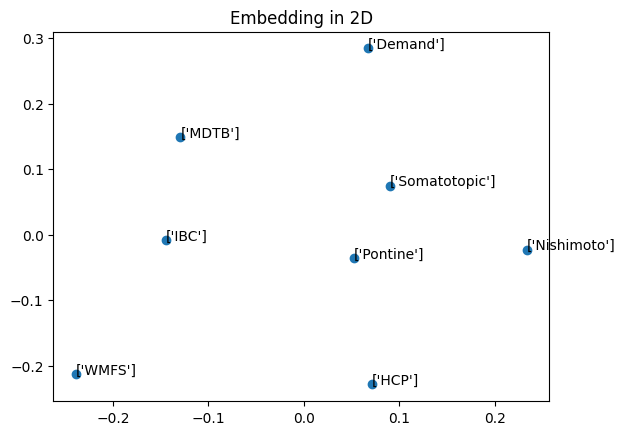

In [52]:
# colors = ['r', 'g', 'b', 'c', 'm']
# size = [64, 64, 64, 64, 64]
fig = plt.figure(figsize=(10, 10))
fig, ax = plt.subplots()
ax.scatter(X_transform[:, 0], X_transform[:, 1])
plt.title('Embedding in 2D')

for i, txt in enumerate(ARI_indiv.columns):
    ax.annotate(txt, (X_transform[i,0], X_transform[i,1]))
plt.show()


In [ ]:
# Add the existing parcellation ARI values to the dataframe
pd.read_csv